## Loading necessary libraries

In [ ]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



## Loading the data

In [ ]:
# Load the Iris dataset
iris = load_iris()



In [ ]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

## Splitting for training and testing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=43)

In [ ]:
# Create a decision tree with entropy
Dtc = DecisionTreeClassifier(criterion = 'entropy')
#Dtc = DecisionTreeClassifier(criterion = 'gini') # gini score is another mesaure of impurity/ error.



## Train the model

In [ ]:
# Fit the classifier to the training data
Dtc.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

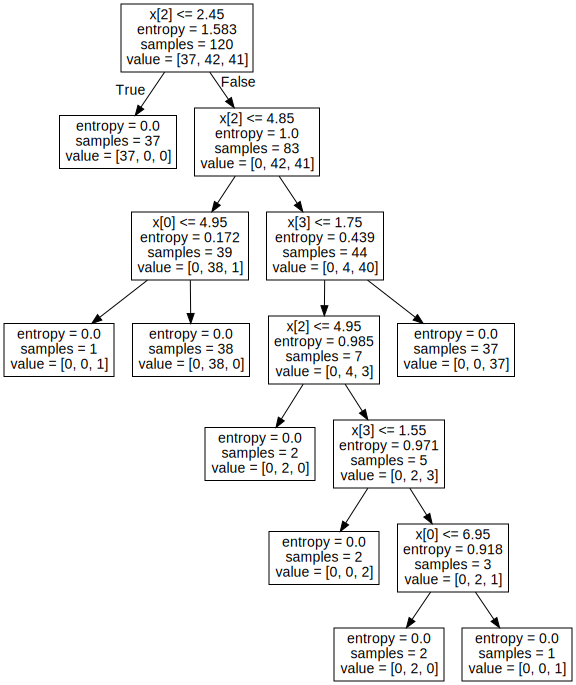

In [ ]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(Dtc, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

## Testing the model

In [ ]:
# Predict the target values for the testing data
y_pred = Dtc.predict(X_test)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: %.3f' % accuracy)

Accuracy: 0.900


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0  7  1]
 [ 0  2  7]]


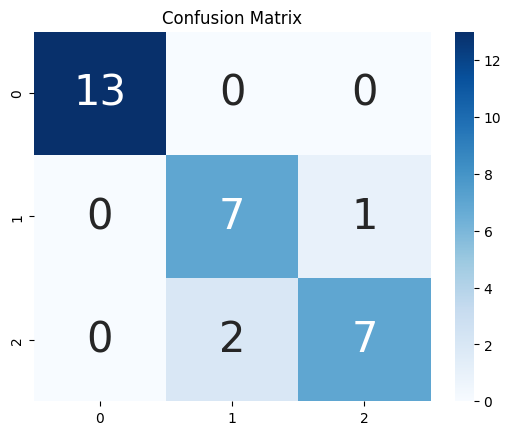

In [ ]:
# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average=None))
print("Recall:",metrics.recall_score(y_test, y_pred,average=None))

Accuracy: 0.9
Precision: [1.         0.77777778 0.875     ]
Recall: [1.         0.875      0.77777778]
